**Xtreme Weather Forecasting**

The task is to predict the arithmetic mean of the maximum and minimum temperature over the next 14 days, for each location and start date.

Dataset : https://www.kaggle.com/competitions/widsdatathon2023/data


In [ ]:
# mounting GDrive to connect csv file
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import libraries
import numpy as np
import pandas as pd  
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.impute import SimpleImputer
import missingno as msno  
#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#import test dataset
test_df = pd.read_csv('/content/gdrive/My Drive/Omdena project/test_data.csv')
test_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,375734,0.0,0.833333,11/1/22,339.88,30.88,30.92,29.17,31.02,29.47,...,-19.28,-39.77,-29.25,40.88,-8.31,14.91,-24.62,31.05,-23.69,6.27
1,375735,0.0,0.833333,11/2/22,334.63,30.88,30.92,29.17,31.02,29.47,...,-19.58,-43.14,-28.62,45.37,-5.42,16.97,-23.94,28.84,-20.61,14.16
2,375736,0.0,0.833333,11/3/22,337.83,30.88,30.92,29.17,31.02,29.47,...,-13.73,-44.22,-27.67,49.76,-1.31,21.44,-19.06,26.85,-16.78,13.42
3,375737,0.0,0.833333,11/4/22,345.81,30.88,30.92,29.17,31.02,29.47,...,-7.97,-49.47,-19.32,52.62,-0.44,21.65,-23.12,23.70,-18.62,10.69
4,375738,0.0,0.833333,11/5/22,357.39,30.88,30.92,29.17,31.02,29.47,...,-0.80,-56.07,-9.89,51.23,-7.57,19.86,-30.56,20.66,-25.08,19.64


In [ ]:
#import train dataset
train_df = pd.read_csv('/content/gdrive/My Drive/Omdena project/train_data.csv')
train_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [ ]:
train_df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375734 entries, 0 to 375733
Columns: 246 entries, index to wind-vwnd-925-2010-20
dtypes: float64(240), int64(4), object(2)
memory usage: 705.2+ MB


In [ ]:
train_df.shape

(375734, 246)

In [ ]:
train_df.columns

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=246)

**Description of Column Namings**

lat: latitude of location (anonymized)

lon: longitude of location (anonymized)

startdate: startdate of the 14 day period

sst: sea surface temperature

icec: sea ice concentration

cancm30, cancm40, ccsm30, ccsm40, cfsv20, gfdlflora0, gfdlflorb0, gfdl0, nasa0, nmme0mean: most recent forecasts from weather models

contest-slp-14d: file containing sea level pressure (slp)

nmme0-tmp2m-34w: file containing most recent monthly NMME model forecasts for tmp2m (cancm30,cancm40, ccsm30, ccsm40, cfsv20, gfdlflora0, gfdlflorb0, gfdl0, nasa0,nmme0mean) and average forecast across those models (nmme0mean)

contest-pres-sfc-gauss-14d: pressure

mjo1d: MJO phase and amplitude

contest-pevpr-sfc-gauss-14d: potential evaporation

contest-wind-h850-14d: geopotential height at 850 millibars

contest-wind-h500-14d: geopotential height at 500 millibars

contest-wind-h100-14d: geopotential height at 100 millibars

contest-wind-h10-14d: geopotential height at 10 millibars

contest-wind-vwnd-925-14d: longitudinal wind at 925 millibars

contest-wind-vwnd-250-14d: longitudinal wind at 250 millibars

contest-wind-uwnd-250-14d: zonal wind at 250 millibars

contest-wind-uwnd-925-14d: zonal wind at 925 millibars

contest-rhum-sig995-14d: relative humidity

contest-prwtr-eatm-14d: precipitable water for entire atmosphere

nmme-prate-34w: weeks 3-4 weighted average of monthly NMME model forecasts for precipitation

nmme-prate-56w: weeks 5-6 weighted average of monthly NMME model forecasts for precipitation

nmme0-prate-56w: weeks 5-6 weighted average of most recent monthly NMME model forecasts for precipitation

nmme0-prate-34w: weeks 3-4 weighted average of most recent monthly NMME model forecasts for precipitation

nmme-tmp2m-34w: weeks 3-4 weighted average of most recent monthly NMME model forecasts for target label, contest-tmp2m-14d__tmp2m

nmme-tmp2m-56w: weeks 5-6 weighted average of monthly NMME model forecasts for target label, contest-tmp2m-14d__tmp2m

mei: MEI (mei), MEI rank (rank), and Niño Index Phase (nip)

elevation: elevation

contest-precip-14d: measured precipitation

climateregions: Köppen-Geigerclimateclassifications



**Target Variable**

In [ ]:
target = [c for c in train_df.columns if c not in test_df.columns][0]
print(target)

contest-tmp2m-14d__tmp2m


**CHECKING MISSING VALUES**

In [ ]:
def filter_na_cols(df):
    count_na_df = df.isna().sum() 
    if count_na_df[count_na_df > 0].tolist():
        return count_na_df[count_na_df > 0]
    else:
        return 'Clean dataset'

In [ ]:
filter_na_cols(train_df)

nmme0-tmp2m-34w__ccsm30    15934
nmme-tmp2m-56w__ccsm3      10280
nmme-prate-34w__ccsm3       8738
nmme0-prate-56w__ccsm30    15934
nmme0-prate-34w__ccsm30    15934
nmme-prate-56w__ccsm3      10280
nmme-tmp2m-34w__ccsm3       8738
ccsm30                     15934
dtype: int64

There are 8 Columns with missing data.

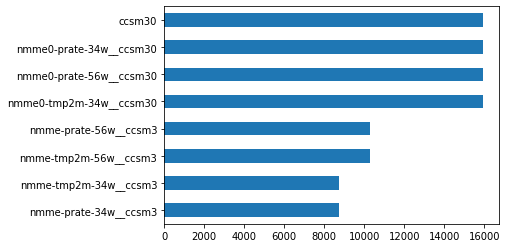

In [ ]:
filter_na_cols(train_df).sort_values().plot(kind='barh');

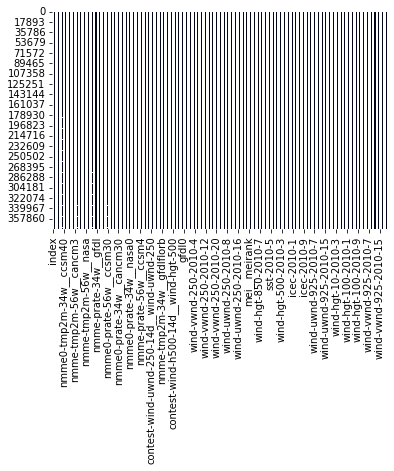

In [ ]:
null_values = train_df.isnull()
sns.heatmap(null_values,cbar=False)
plt.show()

Text(0.5, 1.0, 'CCSM30 Data')

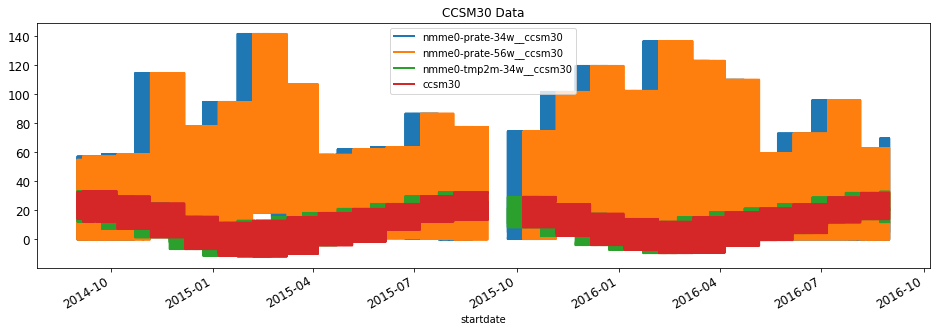

In [ ]:
train_df['startdate'] = pd.to_datetime(train_df['startdate']) 
train_df['month_year'] = train_df['startdate'].dt.to_period("M").astype(str)
ccsm30_missing_df = train_df[['nmme0-prate-34w__ccsm30','nmme0-prate-56w__ccsm30','nmme0-tmp2m-34w__ccsm30','ccsm30','startdate']]
ccsm30_missing_df.set_index('startdate',inplace=True)
ax1 = ccsm30_missing_df.plot(figsize=(16,5),linewidth=2, fontsize=12)
ax1.set_title('CCSM30 Data')

Text(0.5, 1.0, 'CCSM30 Data')

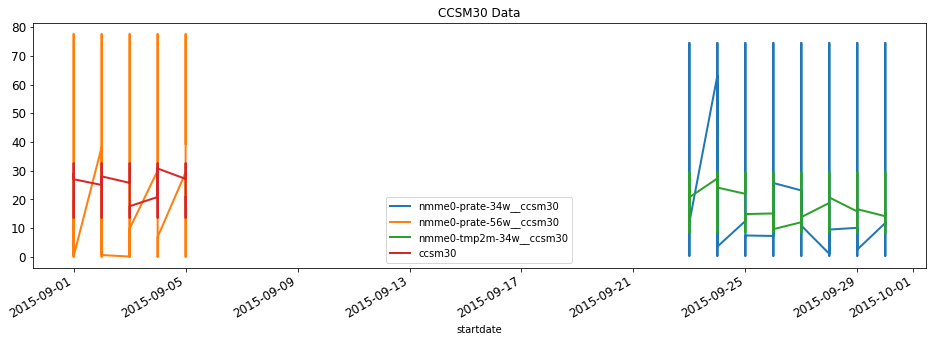

In [ ]:
ax1 = ccsm30_missing_df['2015-09-01':'2015-09-30'].plot(figsize=(16,5),linewidth=2, fontsize=12)
ax1.set_title('CCSM30 Data')

Most of the missing values are mainly from NMME CCSM30 models .Also most of the data are missing from same period of time. Its clear from the above graphs that there is no data from sept 5th to sept 25th 2015.

In [ ]:
filter_na_cols(test_df)


'Clean dataset'

There are no missing values in test dataset.

**HANDLING THE MISSING VALUES**

In [ ]:
def impute_number_col(df):
    null_col = ['nmme0-tmp2m-34w__ccsm30',
    'nmme-tmp2m-56w__ccsm3',
    'nmme-prate-34w__ccsm3',
    'nmme0-prate-56w__ccsm30',
    'nmme0-prate-34w__ccsm30',
    'nmme-prate-56w__ccsm3',
    'nmme-tmp2m-34w__ccsm3',
    'ccsm30']
    number_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    fixed_column_df = number_imputer.fit_transform(df[null_col])
    df[null_col] = fixed_column_df
    return df

Here ,we know that the missing values are a case of NMAR(Not Missing At Random) , and also there is only a small amount of data missing , we will set the null values with the mean of the dataset column.

**CONVERTING STARTDATE INTO DATETIME FORMAT**

In [ ]:
train_df['startdate'] = pd.to_datetime(train_df['startdate'])


In [ ]:
train_df['year'] = pd.DatetimeIndex(train_df['startdate']).year
print (train_df['year'].unique())

[2014 2015 2016]


In [ ]:
train_df['startdate'] = pd.to_datetime(train_df['startdate']) 
train_df['month_year'] = train_df['startdate'].dt.to_period("M").astype(str)
print (train_df['month_year'])

0         2014-09
1         2014-09
2         2014-09
3         2014-09
4         2014-09
           ...   
375729    2016-08
375730    2016-08
375731    2016-08
375732    2016-08
375733    2016-08
Name: month_year, Length: 375734, dtype: object


**COMBINING LATITUDE AND LONGITUDE TO GET LOCATION**

In [ ]:
train_df['location'] = train_df['lat'].map(str) + ' , ' + train_df['lon'].map(str)
print (train_df['location'])

0         0.0 , 0.8333333333333334
1         0.0 , 0.8333333333333334
2         0.0 , 0.8333333333333334
3         0.0 , 0.8333333333333334
4         0.0 , 0.8333333333333334
                    ...           
375729    1.0 , 0.8666666666666667
375730    1.0 , 0.8666666666666667
375731    1.0 , 0.8666666666666667
375732    1.0 , 0.8666666666666667
375733    1.0 , 0.8666666666666667
Name: location, Length: 375734, dtype: object


**UNIQUE LOCATIONS**

In [ ]:
train_df['location'].unique()



array(['0.0 , 0.8333333333333334', '0.0 , 0.8666666666666667',
       '0.0454545454545454 , 0.8333333333333334',
       '0.0454545454545454 , 0.8666666666666667',
       '0.0454545454545454 , 0.9', '0.0909090909090909 , 0.8',
       '0.0909090909090909 , 0.8333333333333334',
       '0.0909090909090909 , 0.8666666666666667',
       '0.0909090909090909 , 0.9',
       '0.0909090909090909 , 0.9333333333333332',
       '0.1363636363636363 , 0.6666666666666666',
       '0.1363636363636363 , 0.7',
       '0.1363636363636363 , 0.7333333333333333',
       '0.1363636363636363 , 0.7666666666666667',
       '0.1363636363636363 , 0.8',
       '0.1363636363636363 , 0.8333333333333334',
       '0.1363636363636363 , 0.8666666666666667',
       '0.1363636363636363 , 0.9',
       '0.1363636363636363 , 0.9333333333333332',
       '0.1363636363636363 , 0.9666666666666668',
       '0.1363636363636363 , 1.0',
       '0.1818181818181818 , 0.6333333333333333',
       '0.1818181818181818 , 0.6666666666666666',

In [ ]:
print(train_df.location.value_counts())

0.0 , 0.8333333333333334                   731
0.6363636363636364 , 0.9                   731
0.8181818181818182 , 0.0                   731
0.8636363636363636 , 0.2666666666666666    731
0.8636363636363636 , 0.2                   731
                                          ... 
0.9090909090909092 , 0.5666666666666667    731
0.8636363636363636 , 0.6                   731
0.8636363636363636 , 0.6666666666666666    731
0.8636363636363636 , 0.6333333333333333    731
0.8636363636363636 , 0.7                   731
Name: location, Length: 514, dtype: int64


There are 514 unique locations in the dataset.

**LOCATION SCATTER PLOT**

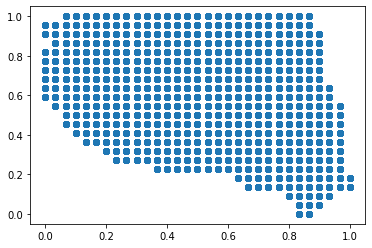

In [ ]:
plt.scatter(train_df['lon'], train_df['lat'])
plt.show()

As we know the locations are from US , the above cordinates are similar to the Gulf Coast and South east of US.

**LOCATIONS IN TEST DATA**

In [ ]:
test_df['location'] = test_df['lat'].map(str) + ' , ' + test_df['lon'].map(str)
print (test_df['location'])

0        0.0 , 0.8333333333333334
1        0.0 , 0.8333333333333334
2        0.0 , 0.8333333333333334
3        0.0 , 0.8333333333333334
4        0.0 , 0.8333333333333334
                   ...           
31349    1.0 , 0.8666666666666667
31350    1.0 , 0.8666666666666667
31351    1.0 , 0.8666666666666667
31352    1.0 , 0.8666666666666667
31353    1.0 , 0.8666666666666667
Name: location, Length: 31354, dtype: object


In [ ]:
test_df['location'].unique()


array(['0.0 , 0.8333333333333334', '0.0 , 0.8666666666666667',
       '0.0454545454545454 , 0.8333333333333334',
       '0.0454545454545454 , 0.8666666666666667',
       '0.0454545454545454 , 0.9', '0.0909090909090909 , 0.8',
       '0.0909090909090909 , 0.8333333333333334',
       '0.0909090909090909 , 0.8666666666666667',
       '0.0909090909090909 , 0.9',
       '0.0909090909090909 , 0.9333333333333332',
       '0.1363636363636363 , 0.6666666666666666',
       '0.1363636363636363 , 0.7',
       '0.1363636363636363 , 0.7333333333333333',
       '0.1363636363636363 , 0.7666666666666667',
       '0.1363636363636363 , 0.8',
       '0.1363636363636363 , 0.8333333333333334',
       '0.1363636363636363 , 0.8666666666666667',
       '0.1363636363636363 , 0.9',
       '0.1363636363636363 , 0.9333333333333332',
       '0.1363636363636363 , 0.9666666666666668',
       '0.1363636363636363 , 1.0',
       '0.1818181818181818 , 0.6333333333333333',
       '0.1818181818181818 , 0.6666666666666666',

In [ ]:
print(test_df.location.value_counts())

0.0 , 0.8333333333333334                   61
0.8181818181818182 , 0.2                   61
0.7727272727272727 , 0.0                   61
0.7272727272727273 , 0.9                   61
0.7272727272727273 , 0.8666666666666667    61
                                           ..
0.4545454545454545 , 0.5333333333333333    61
0.4545454545454545 , 0.5                   61
0.4545454545454545 , 0.4666666666666667    61
0.4545454545454545 , 0.4333333333333333    61
1.0 , 0.8666666666666667                   61
Name: location, Length: 514, dtype: int64


There are 514 unique locations in test data .

In [ ]:
scale=14
train_df.loc[:,'lat']=round(train_df.lat,scale)
train_df.loc[:,'lon']=round(train_df.lon,scale)

test_df.loc[:,'lat']=round(test_df.lat,scale)
test_df.loc[:,'lon']=round(test_df.lon,scale)

all_df = pd.concat([train_df, test_df], axis=0)

all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()
print(f'{all_df.loc_group.nunique()} unique locations')



514 unique locations
[]
[]


In [ ]:
train_df = all_df.iloc[:len(train_df)]
test_df = all_df.iloc[len(train_df):]

locations_train=list(train_df.loc_group.unique())
locations_test=list(test_df.loc_group.unique())
result_1 = list(set(locations_train).difference(locations_test))
print(result_1)

result_2=list(set(locations_test).difference(locations_train))
print(result_2)

[]
[]


All the locations in test data are in train data.

**TEMPERATURE TIME SERIES**

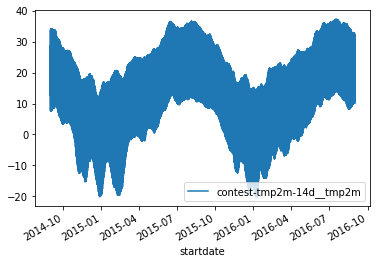

In [ ]:
train_df.plot(x="startdate", y="contest-tmp2m-14d__tmp2m")
plt.show()

This shows a typical temperature pattern .

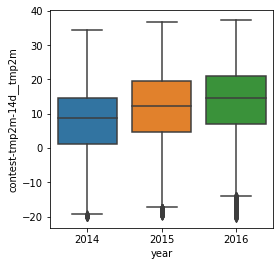

In [ ]:
fig, ax = plt.subplots(figsize = (4,4))

sns.boxplot(data=train_df, x='year', y='contest-tmp2m-14d__tmp2m')

There is a increase in mean temperature values each year.

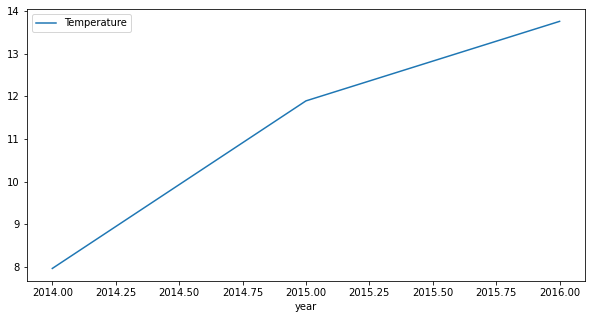

In [ ]:
df= pd.DataFrame()   
df['Temperature'] = train_df.groupby('year')['contest-tmp2m-14d__tmp2m'].mean()
df.plot(y='Temperature', kind='line',figsize=(10, 5))

Each year tempertaure rises 2-4 degrees!!!

**CLIMATE REGION**

Abbreviations of Climate regions 

BSh: Hot semi-arid climate

BSk: Cold semi-arid climate

BWh: Hot desert climate

BWk: Cold desert climate

Cfa: Humid subtropical climate

Cfb: Temperate oceanic climate or subtropical highland climate

Csa: Hot-summer Mediterranean climate

Csb: Warm-summer Mediterranean climate

Dfa: Hot-summer humid continental climate

Dfb: Warm-summer humid continental climate

Dfc: Subarctic climate

Dsb: Mediterranean-influenced warm-summer humid continental climate

Dsc: Mediterranean-influenced subarctic climate

Dwa: Monsoon-influenced hot-summer humid continental climate

Dwb: Monsoon-influenced warm-summer humid continental climate

**PLOTTING CLIMATE REGIONS**

[Text(0.5, 1.0, 'Train_Location')]

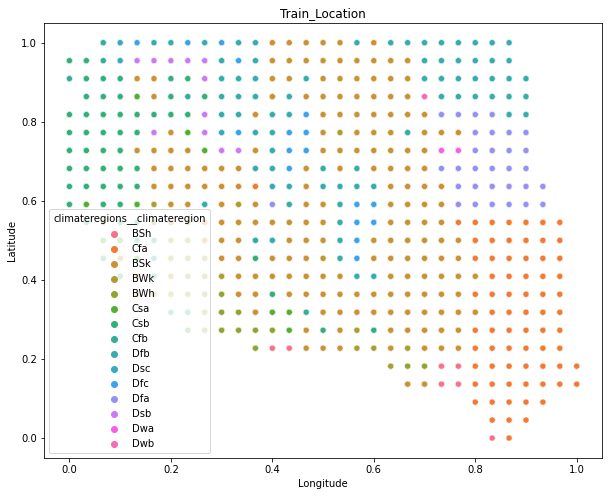

In [ ]:
plt.figure(figsize=(10,8))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sns.scatterplot(x='lon', y='lat',hue ="climateregions__climateregion",data=train_df).set(title ="Train_Location")



**Climate Region Counts** 

In [ ]:
climate_regions = train_df.groupby('climateregions__climateregion').size().reset_index(name='counts')
climate_regions['percentage'] = climate_regions['counts'] / climate_regions['counts'].sum() * 100
print(climate_regions)

   climateregions__climateregion  counts  percentage
0                            BSh    5117    1.361868
1                            BSk  139621   37.159533
2                            BWh    9503    2.529183
3                            BWk   13889    3.696498
4                            Cfa   51901   13.813230
5                            Cfb    4386    1.167315
6                            Csa    9503    2.529183
7                            Csb   40936   10.894942
8                            Dfa   22661    6.031128
9                            Dfb   52632   14.007782
10                           Dfc   12427    3.307393
11                           Dsb    8041    2.140078
12                           Dsc    2924    0.778210
13                           Dwa    1462    0.389105
14                           Dwb     731    0.194553


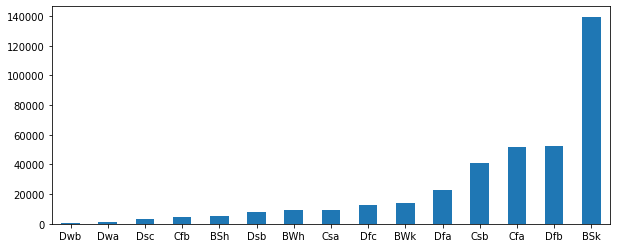

In [ ]:
train_df['climateregions__climateregion'].value_counts().sort_values().plot(kind='bar', figsize=(10,4), rot=0)


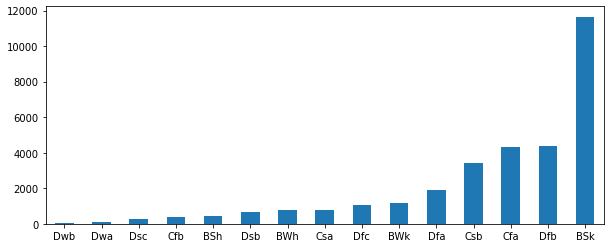

In [ ]:
test_df['climateregions__climateregion'].value_counts().sort_values().plot(kind='bar', figsize=(10,4), rot=0)

The distributions of climate regions for train data and test data are pretty much similar.

**RELATIONSHIP BETWEEN THE VARIABLES BASED ON CLIMATIC REGIONS**

**TEMPERATURE VS HUMIDITY**

[Text(0.5, 1.0, 'Temperature Vs Humidity')]

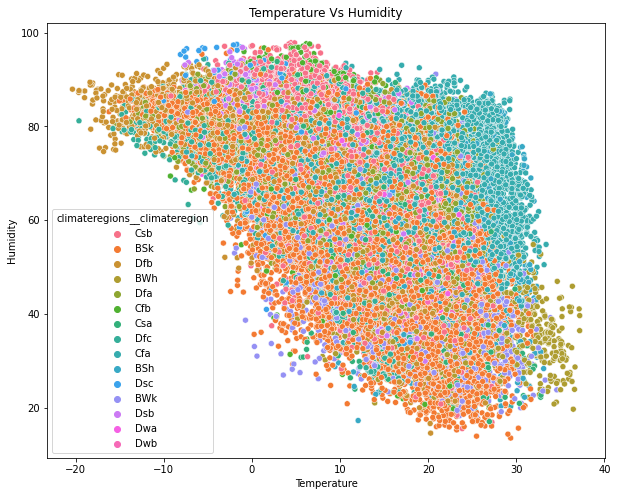

In [ ]:
sample_df=train_df.sample(int(0.1*len(train_df)))
plt.figure(figsize=(10,8))
plt.xlabel("Temperature")
plt.ylabel("Humidity")
sns.scatterplot(x='contest-tmp2m-14d__tmp2m', y='contest-rhum-sig995-14d__rhum',hue ="climateregions__climateregion",data=sample_df).set(title ="Temperature Vs Humidity")

**PRECIPATION VS HUMIDITY**

[Text(0.5, 1.0, 'PERCIPITATIONS VS HUMIDITY')]

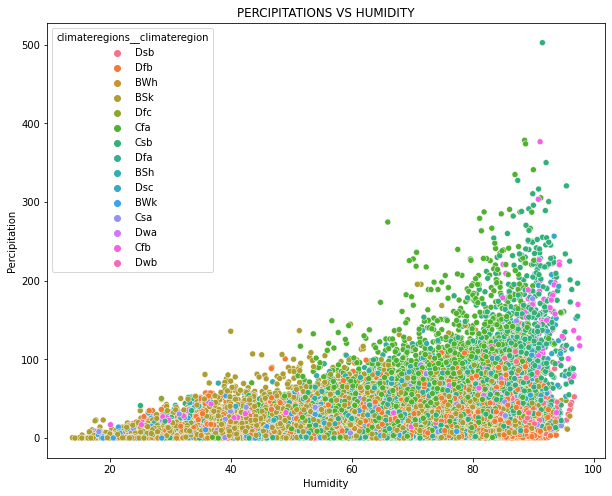

In [ ]:
sample_df=train_df.sample(int(0.1*len(train_df)))
plt.figure(figsize=(10,8))
plt.xlabel("Humidity")
plt.ylabel("Percipitation")
sns.scatterplot( x='contest-rhum-sig995-14d__rhum',y='contest-precip-14d__precip',hue ="climateregions__climateregion",data = sample_df).set(title ="PERCIPITATIONS VS HUMIDITY")

Findings : 1.The lower the humidity , the higher the temperature .
           2.Higher the humidity , higher the percipitaions . 
           In other words , lower the temperature , higher the humidity and higher will be the percipitations and vice versa.

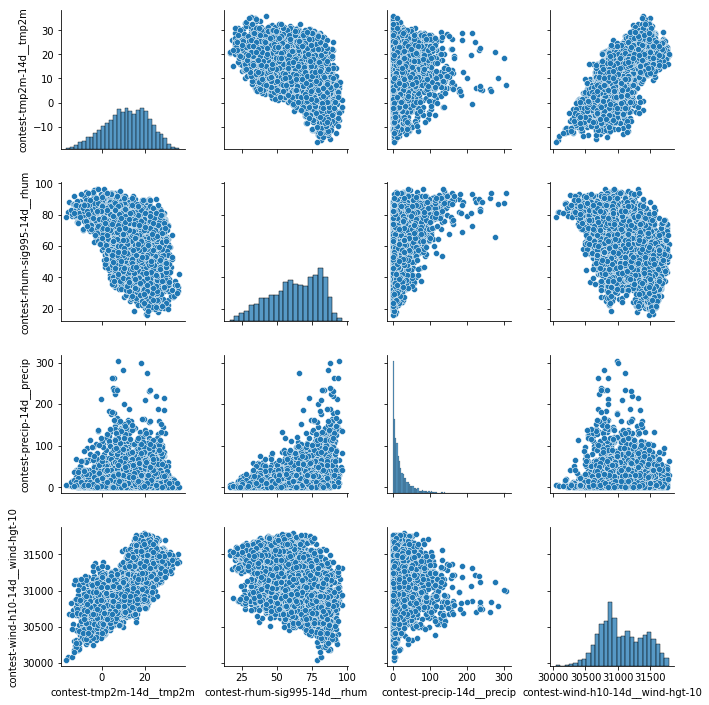

In [ ]:

sample_df=train_df.sample(int(0.01*len(train_df)))
# select columns for pair plot
cols = ['contest-tmp2m-14d__tmp2m', 'contest-rhum-sig995-14d__rhum', 'contest-precip-14d__precip','contest-wind-h10-14d__wind-hgt-10']

# create pair plot with selected columns
sns.pairplot(sample_df[cols])

# show plot
plt.show()

The above pairplot shows the effect of each environmental factors over the other.Main factors considered in the plot are temperature , humidity, wind and percipitations .

**CORRELATION BETWEEN THE VARIABLES**

In [ ]:
data = pd.DataFrame()    # creating a dataset of environmental factors...
data['Temperatue'] = train_df['contest-tmp2m-14d__tmp2m']
data['evaporation'] = train_df['contest-pevpr-sfc-gauss-14d__pevpr']
data['humidity'] = train_df['contest-rhum-sig995-14d__rhum']
data['sealevel_pressure'] = train_df['contest-slp-14d__slp']
data['pressure'] = train_df['contest-pres-sfc-gauss-14d__pres']
data['wind'] = train_df['contest-wind-h10-14d__wind-hgt-10']
data['elevation'] = train_df['elevation__elevation']
data['percipitation'] = train_df['contest-precip-14d__precip']




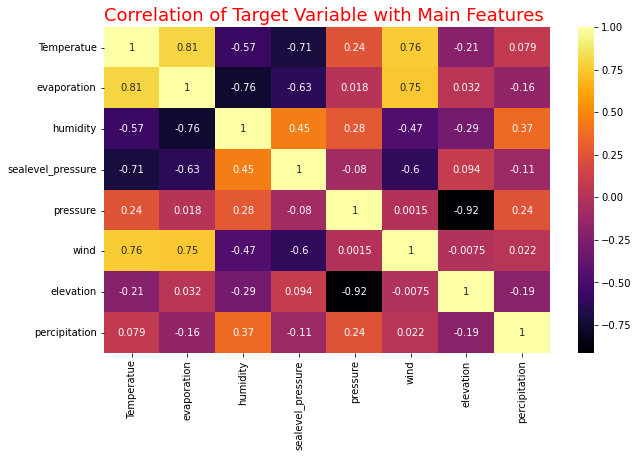

In [ ]:
def Plotting():          # Plotting the Heatmap...
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.corr(), cmap='inferno', annot=True)
    plt.title("Correlation of Target Variable with Main Features ", size=18, c="red")
    plt.show()

Plotting()

The above plot shows the correlation  between the various factors and also its impact on temperture ( targeted variable) in heat map .


In [ ]:
data1 = pd.DataFrame()    # creating a dataset of temperature and percipiations  at 3-4 weeks and 5-6 weeks...
data1['MostrecentMeanTemperature34'] = train_df['nmme0-tmp2m-34w__nmme0mean']
data1['MeanPercipitation34'] = train_df['nmme-prate-34w__nmmemean']
data1['MeanPercipitation56'] = train_df['nmme-prate-56w__nmmemean']
data1['MostrecentPercipiations56'] = train_df['nmme0-prate-56w__nmme0mean']
data1['MostrecentPercipiations34'] = train_df['nmme0-prate-34w__nmme0mean']
data1['MeanTemperature34'] = train_df['nmme-tmp2m-34w__nmmemean']
data1['MeanTemperature56'] = train_df['nmme-tmp2m-56w__nmmemean']
data1['Mostrecentforecast'] = train_df['nmme0mean']
data1['Targetvariable'] = train_df['contest-tmp2m-14d__tmp2m']


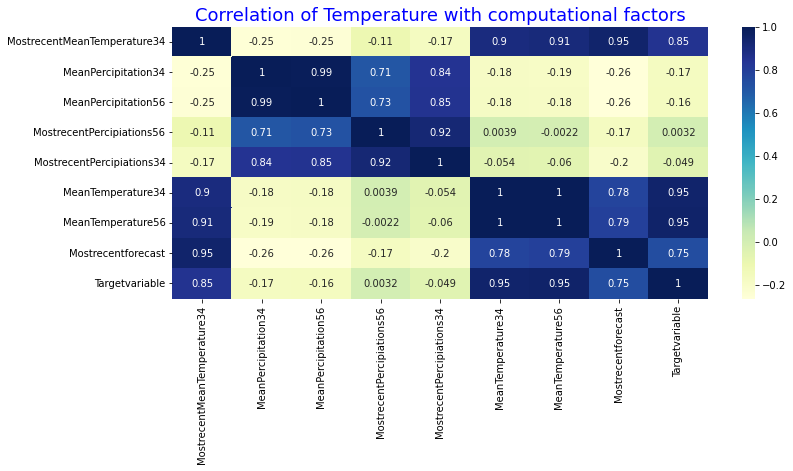

In [ ]:
def Plotting1():          # Plotting the Heatmap...
    plt.figure(figsize=(12,5))
    sns.heatmap(data1.corr(), cmap="YlGnBu", annot=True)
    plt.title("Correlation of Temperature with computational factors", size=18, c="blue")
    plt.show()

Plotting1()

In the above plot , we can see that the NMME forecasts for target variable for 3-4 weeks and 5-6 weeks are same and the same apply for percipitation forecasts too.Since both the forecasts 3-4 weeks and 5-6 weeks  columns have high correlation between them , we can drop one of them and thus reduce the number of columns.